# <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>AI Powered Book Recommendation System Using Collaborative Filtering</div></b>

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Project Objective
The aim of this project is to develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

---

## Problem Statement
A book recommendation system enhances user experience by suggesting titles tailored to individual preferences, making it easier for users to discover books they are likely to enjoy. For online bookstores, this can lead to increased engagement, higher conversion rates, and greater customer satisfaction. By analyzing user behavior and leveraging collaborative filtering, the system helps match readers with books they may not have found otherwise, thereby boosting sales and encouraging repeat visits.

---

In [2]:
# Import Libriaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Collection

In [4]:
ratings_df = pd.read_csv("C:/Users/Harrison/Downloads/Recommendation_project/data/ratings.csv")
books_df = pd.read_csv("C:/Users/Harrison/Downloads/Recommendation_project/data/books.csv")

In [5]:
# Display the first 5 rows of rating dataset
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
# Check the info about the data
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [7]:
# Check unique book_id in ratings datatset
unique_book_ids = ratings_df['book_id'].unique()
print(f"Number of unique book_ids: {len(unique_book_ids)}")
print("Sample book_ids:", unique_book_ids[:10])


Number of unique book_ids: 10000
Sample book_ids: [ 1  2  3  4  5  6  7  8  9 10]


In [8]:
# Check the summary statistics of the dataset
ratings_df.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [9]:
# Display the first 5 rows of books dataset
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [10]:
# Check the summary statistics of the dataset
books_df.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [11]:
# Check unique id in books dataset
unique_book_ids = books_df['id'].unique()
print(f"Number of unique book_ids: {len(unique_book_ids)}")
print("Sample book_ids:", unique_book_ids[:10])


Number of unique book_ids: 10000
Sample book_ids: [ 1  2  3  4  5  6  7  8  9 10]


In [12]:
# Check the info about the data
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

## Data Preparation
- Prepare a smaller subset of the user-item matrix for collaborative filtering.

In [25]:
# Subset ratings data (e.g., first 10,000 entries)
ratings_subset = ratings_df.head(10000)

# Create user-item matrix
user_item_matrix = ratings_subset.pivot_table(index='user_id', columns='book_id', values='rating')

# Fill missing values with 0
user_item_matrix_filled = user_item_matrix.fillna(0)

# Preview matrix
user_item_matrix_filled.head()


book_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,5.0,0.0,3.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0
439,3.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,3.0,5.0,0.0,0.0,0.0,3.0,0.0,4.0


## Collaborative Filtering
- Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix_filled)

# Convert to DataFrame
user_similarity_df = pd.DataFrame(user_similarity,
                                   index=user_item_matrix_filled.index,
                                   columns=user_item_matrix_filled.index)

# Function to recommend books for a given user with titles and authors
def recommend_books(user_id, user_item_matrix, similarity_matrix, books_df, n_recommendations=5):
    # Get similar users
    similar_users = similarity_matrix.loc[user_id].sort_values(ascending=False)[1:]

    # Get books rated by similar users
    similar_users_ratings = user_item_matrix.loc[similar_users.index]

    # Compute weighted ratings
    weighted_ratings = similar_users_ratings.T.dot(similar_users)
    if similar_users.sum() == 0:
        return pd.DataFrame(columns=['book_id', 'title', 'authors', 'score'])  # Return empty DataFrame

    weighted_ratings = weighted_ratings / similar_users.sum()

    # Remove books already rated by the user
    user_rated_books = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    recommendations = weighted_ratings.drop(user_rated_books, errors='ignore').sort_values(ascending=False).head(n_recommendations)

    # Create DataFrame from recommendations
    recs_df = pd.DataFrame({
        'book_id': recommendations.index,
        'score': recommendations.values
    })

    # Merge with books_df using 'id' in books_df
    recs_df = recs_df.merge(books_df[['id', 'title', 'authors']], left_on='book_id', right_on='id', how='left')
    recs_df = recs_df.drop(columns='id')  # Drop duplicate column

    return recs_df[['book_id', 'title', 'authors', 'score']]


In [27]:
# Example usage
recommendations = recommend_books(314, user_item_matrix_filled, user_similarity_df, books_df)
from IPython.display import display
display(recommendations)


,book_id,title,authors,score
0,11,The Kite Runner,Khaled Hosseini,1.025717
1,4,To Kill a Mockingbird,Harper Lee,0.973161
2,16,"The Girl with the Dragon Tattoo (Millennium, #1)","Stieg Larsson, Reg Keeland",0.971534
3,27,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",0.969390
4,2,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",0.968291


## Evaluation
- Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

In [36]:
# Subset the first 10,000 ratings
ratings_subset = ratings_df.head(10000)

# Filter books to only those present in the ratings subset
books_subset = books_df[books_df['id'].isin(ratings_subset['book_id'].unique())]


In [37]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
train_data, test_data = train_test_split(ratings_subset, test_size=0.2, random_state=42)

# Remove duplicates
train_data = train_data.drop_duplicates(subset=['user_id', 'book_id'], keep='first')
test_data = test_data.drop_duplicates(subset=['user_id', 'book_id'], keep='first')


In [38]:
# Train matrix
train_matrix = train_data.pivot(index='user_id', columns='book_id', values='rating').fillna(0)

# Test matrix
test_matrix = test_data.pivot(index='user_id', columns='book_id', values='rating').fillna(0)


In [39]:
# Compute user-user similarity on training matrix
user_similarity = cosine_similarity(train_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=train_matrix.index, columns=train_matrix.index)


In [40]:
# Prediction Function
def predict_ratings(user_matrix, similarity_matrix):
    weighted_sum = np.dot(similarity_matrix, user_matrix)
    sim_sum = np.array([np.abs(similarity_matrix).sum(axis=1)]).T
    return np.where(sim_sum != 0, weighted_sum / sim_sum, 0)

# Predict ratings
predicted_ratings = predict_ratings(train_matrix.values, user_similarity)


In [41]:
# Evaluation (MSE on Aligned Subset)
from sklearn.metrics import mean_squared_error

# Align users and books
common_users = test_matrix.index.intersection(train_matrix.index)
common_books = test_matrix.columns.intersection(train_matrix.columns)

# Slice matching rows and columns
user_idx = [train_matrix.index.get_loc(u) for u in common_users]
book_idx = [train_matrix.columns.get_loc(b) for b in common_books]

# Actual and predicted values
actual = test_matrix.loc[common_users, common_books].values
predicted = predicted_ratings[np.ix_(user_idx, book_idx)]

# Mean Squared Error
mse = mean_squared_error(actual, predicted)
print("📊 Mean Squared Error (MSE):", mse)


📊 Mean Squared Error (MSE): 1.0265043989597333


In [42]:
# Recommendation Function (Top-N)
def recommend_books(user_id, user_item_matrix, similarity_matrix, books_df, n_recommendations=5):
    # Get similar users
    similar_users = similarity_matrix.loc[user_id].sort_values(ascending=False)[1:]

    # Get books rated by similar users
    similar_users_ratings = user_item_matrix.loc[similar_users.index]

    # Compute weighted ratings
    weighted_ratings = similar_users_ratings.T.dot(similar_users)
    if similar_users.sum() == 0:
        return pd.DataFrame(columns=['book_id', 'title', 'authors', 'score'])

    weighted_ratings = weighted_ratings / similar_users.sum()

    # Remove already rated books
    user_rated_books = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    recommendations = weighted_ratings.drop(user_rated_books, errors='ignore').sort_values(ascending=False).head(n_recommendations)

    # Merge with book metadata
    recs_df = pd.DataFrame({
        'book_id': recommendations.index,
        'score': recommendations.values
    })
    recs_df = recs_df.merge(books_df[['id', 'title', 'authors']], left_on='book_id', right_on='id', how='left')
    recs_df = recs_df.drop(columns='id')
    
    return recs_df[['book_id', 'title', 'authors', 'score']]


In [43]:
# Test Recommendation Function
# Example user ID from train_matrix
example_user_id = train_matrix.index[0]

recommend_books(
    user_id=example_user_id,
    user_item_matrix=train_matrix,
    similarity_matrix=user_similarity_df,
    books_df=books_subset,
    n_recommendations=5
)


,book_id,title,authors,score
0,64,My Sister's Keeper,Jodi Picoult,1.202483
1,100,The Poisonwood Bible,Barbara Kingsolver,1.149957
2,40,"Eat, Pray, Love",Elizabeth Gilbert,1.071719
3,87,Night (The Night Trilogy #1),"Elie Wiesel, Marion Wiesel",1.070754
4,84,"Jurassic Park (Jurassic Park, #1)",Michael Crichton,1.022368


## Visualizations and Insights
- Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

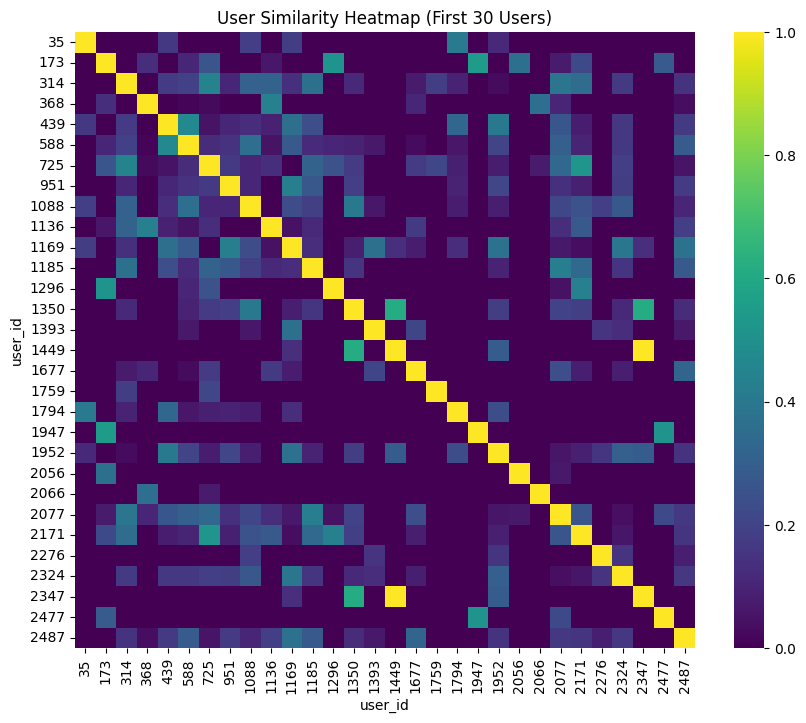

Top Recommended Books for User 314:


,id,title
0,1,"The Hunger Games (The Hunger Games, #1)"
1,2,Harry Potter and the Sorcerer's Stone (Harry P...
2,3,"Twilight (Twilight, #1)"
3,4,To Kill a Mockingbird


In [53]:
import matplotlib.pyplot as plt

# Create a heatmap to visualize user similarities
# Heatmap of user similarities
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df.iloc[:30, :30], cmap='viridis')
plt.title('User Similarity Heatmap (First 30 Users)')
plt.show()

# Analyze the most recommended books
# Analyze most recommended books (example for user_id 314)
recommended_book_ids = recommend_books(314, user_item_matrix_filled, user_similarity_df, books_df).index

# Map book IDs to titles
recommended_books = books_df[books_df['id'].isin(recommended_book_ids)][['id', 'title']]

print("Top Recommended Books for User 314:")
from IPython.display import display
display(recommended_books)
